In [2]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

In [6]:
import pandas as pd
from tensorflow.keras.datasets import boston_housing

# Load the dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Define column names
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX",
    "PTRATIO", "B", "LSTAT"
]

# Convert to DataFrame
df = pd.DataFrame(train_data, columns=columns)

# Check for missing values
print(df.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [7]:
# Normalize features
X=df.iloc[:,0:-1]
y=df['LSTAT']
cols = X.columns
scaler = StandardScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=cols)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (323, 12)
y_train: (323,)
X_test: (81, 12)
y_test: (81,)


In [8]:
model1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

model1.summary ()

C:\Users\Sakshi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
test_data = test_data.reshape(-1, train_data.shape[1])  # Ensuring correct shape


In [37]:
# Compile Model
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train Model
history = model1.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9825 - mae: 1.5957 - val_loss: 21.5116 - val_mae: 3.5038
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2849 - mae: 1.5979 - val_loss: 21.5965 - val_mae: 3.4843
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5264 - mae: 1.5963 - val_loss: 21.8528 - val_mae: 3.5486
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9786 - mae: 1.4809 - val_loss: 20.8832 - val_mae: 3.4440
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2907 - mae: 1.5296 - val_loss: 21.6595 - val_mae: 3.4731
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6682 - mae: 1.5114 - val_loss: 21.5836 - val_mae: 3.5159
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6832 - mae: 1.6238 - val_loss: 21.0801 - val_mae: 3.4734
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9499 - mae: 1.5674 - val_loss: 21.3557 - val_mae: 3.4789
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - los

In [38]:
#Evaluate Model
test_loss, test_mae = model1.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Calculate R-squared (which can be interpreted as a measure of "goodness of fit")
from sklearn.metrics import r2_score
y_pred = model1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-2: {r2}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20.4398 - mae: 3.3749 
Test Loss: 21.643665313720703, Test MAE: 3.5268819332122803
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000192683647C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R-2: 0.621740240142981


In [33]:
# Predict house prices
y_pred = model1.predict(X_test)
print("Sample Predictions: ", y_pred[:5].flatten())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Sample Predictions:  [15.476294  13.611977  10.477513   6.0295186 24.96751  ]


In [34]:
y_pred = y_pred.reshape(-1,)
result = pd.DataFrame(
    {
        'Actual':y_test.values,
        'Prediction':y_pred
    }
)
result['Resuidual'] = abs(result['Actual']-result['Prediction'])

print (result['Resuidual'].sum()/len(result))

3.5053902397626717


In [35]:
result

,Actual,Prediction,Resuidual
0,18.33,15.476294,2.853706
1,2.96,13.611977,10.651977
2,9.28,10.477513,1.197513
3,9.52,6.029519,3.490481
4,13.44,24.967510,11.527510
...,...,...,...
76,23.69,22.940350,0.749650
77,17.27,15.448658,1.821342
78,3.16,6.029519,2.869519
79,12.01,13.288255,1.278255


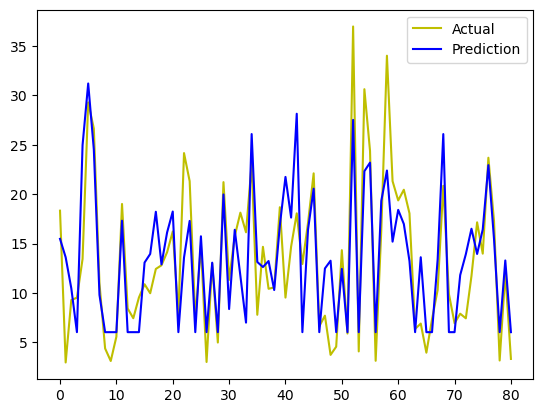

In [36]:
import matplotlib.pyplot as plt

plt.plot(result['Actual'], color='y', label='Actual')
plt.plot(result['Prediction'],color='b',label='Prediction')
plt.legend()
plt.show()